# MusicLab 5 - Extract the Motion of Performances
In this notebook I will load the files and cut them based on the start fo the shake.  
The start of the shake is defined as the section closest after 13:54 with the characteristic up and down motion. 
To identify the start, the peak of the first shake (positive or negative, whatever comes first) will be used to demarcate the beginning of the music.  

## Performance times in UTC
Renick Bell performance: ~13:54-14:25
Khoparzi performance: ~14:34-15:04
Performance times were extracted by examining Renick's computer time when he started and ended and then examining how much time was between Renick and Khoparzi's performances.

## Load the data
Note that the df_motion files contain 7 columns. timestamp is a millisecond representation of time. To convert quickly to human readable date time, you can use this website: https://www.epochconverter.com/  
A 1-unit change in time stamp = 1 ms

### Load the libraries

In [10]:
import os, fnmatch
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 
# start with this backend and change to Qt for the interactive plotting

In [11]:
matplotlib.rc('xtick', labelsize=14)     
matplotlib.rc('ytick', labelsize=14)
matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['legend.fontsize'] = 20
matplotlib.rcParams['figure.titlesize'] = 16

### Directory management

In [12]:
path = '/Users/danasw/Documents/PhD/Research/MusicLab_Lockdown/Files_for_Research_Drive/Raw_Data/Movement_Data/'
datasets = ['Pt-0'+str(nr) for nr in range(1,10)]
datasets = datasets+['Pt-'+str(nr) for nr in range(10,20)]

In [13]:
def ffind(pattern, path):
    result=[]
    for root, dirs, files in os.walk(path):
        for name in files:
            if fnmatch.fnmatch(name, pattern):
                result.append(os.path.join(root, name))
    return result

### Read into pandas dataframe

In [14]:
def GetLongestFile(dictionary):
    return max((len(v), k) for k,v in dictionary.items())

In [15]:
df_motion_files={}
df_motion_dict = {}
for datset in range(0,19):
    pt = datset+1
    participant_dict = {}
    file_dict = {}
    n = 0
    for dat in ffind('*.csv', os.path.join(path, datasets[datset])):
        if 'Motion' in dat:
            df_motion = pd.read_csv(dat, index_col=1)
            n+=1
            participant_dict[n] = df_motion
            file_dict[n] = os.path.relpath(dat)
    # find the participants' longest motion file 
    (v, k) = GetLongestFile(participant_dict)
    if v > 7200: # if file is longer than 2-minutes
        longest = participant_dict[k]
        # convert index to human readable datetime
        longest.loc[:,"datetime"] = pd.to_datetime(longest.timestamp, unit='ms')
        longest = longest.set_index(['datetime'])
        df_motion_dict[pt] = longest
        df_motion_files[pt] = file_dict[k]
    

### Create dictionary of Renick's audience 

Note: the df_motion files are not being cut when they are being stored. This section of code is only storing those participants who have some data during Renick's performance and removing those who do not. 

In [16]:
## Remove participants who have no data during renick's performance (pt 6, 7, 16)
renick_audience = {}
for k,v in df_motion_dict.items():
    df_motion = df_motion_dict[k]
    df_motion_r = df_motion.sort_index().loc['2020-07-10 13:54' : '2020-07-10 14:25.5', :] # 13:54-14:25.5
    if k != 10 and len(df_motion_r)>0: # remove any dataframes not containing data during Renick's performance and Renick's performance
        renick_audience[k]=df_motion    

## Identify the shake with ginput

### Check to make sure that the shake is in the first 2 mins of each participants' data

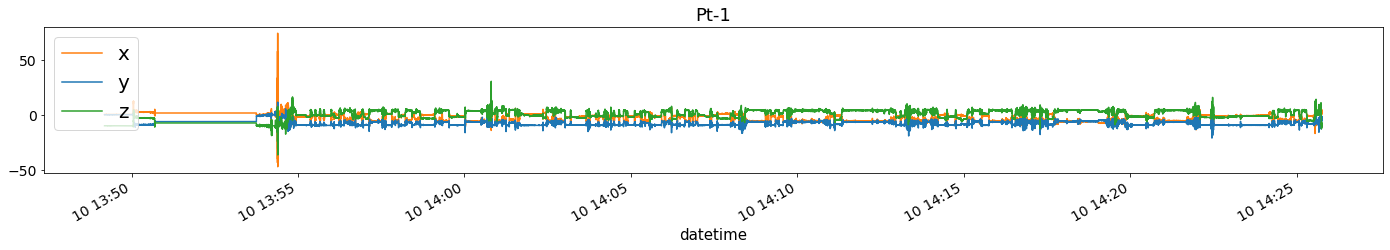

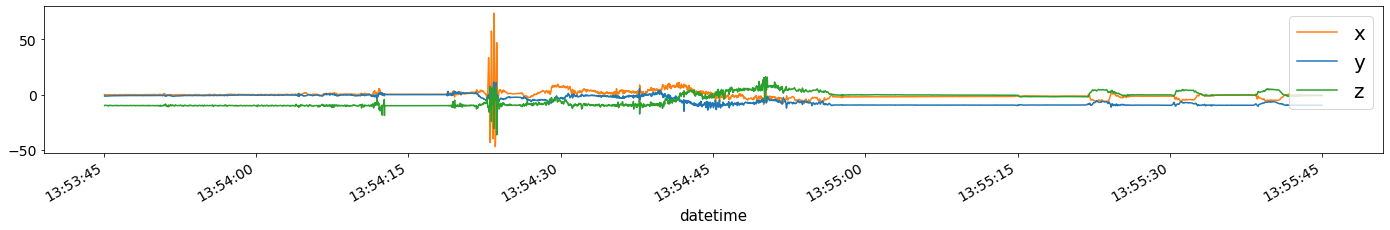

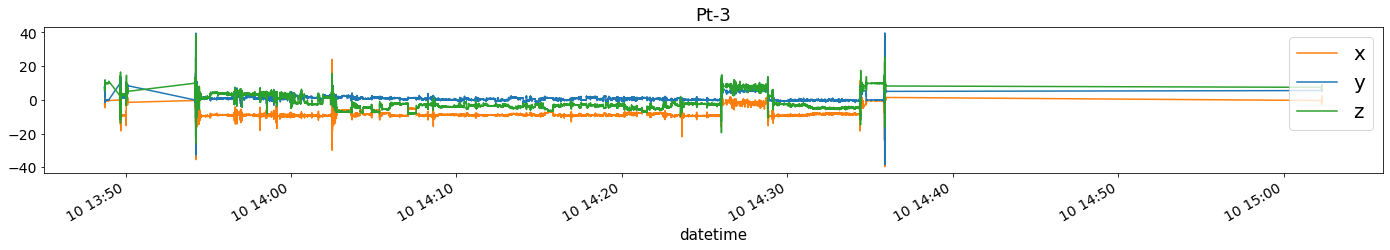

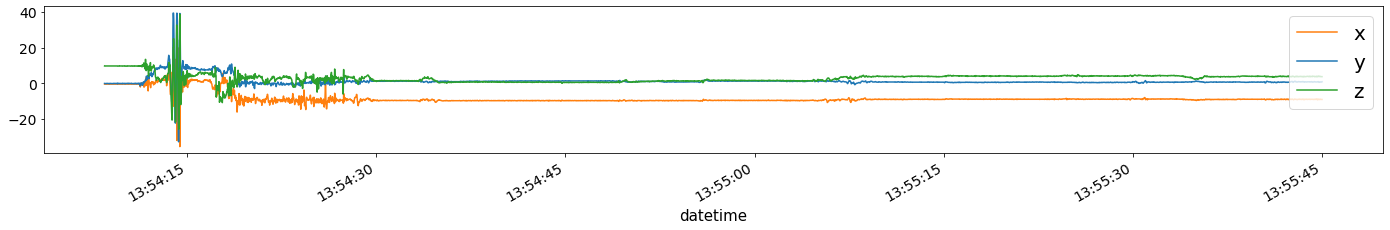

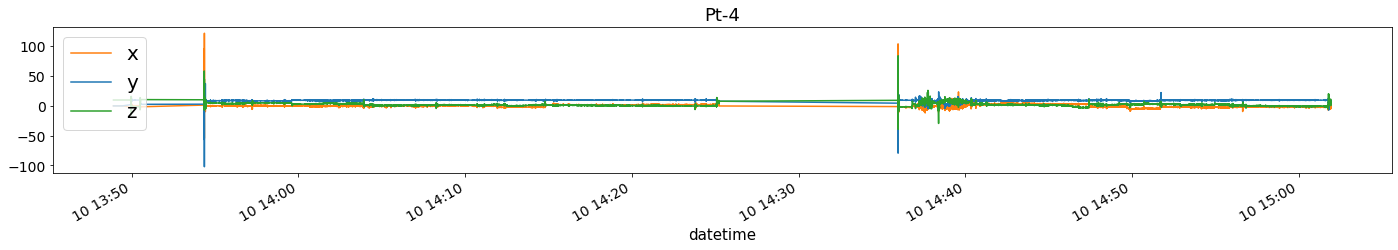

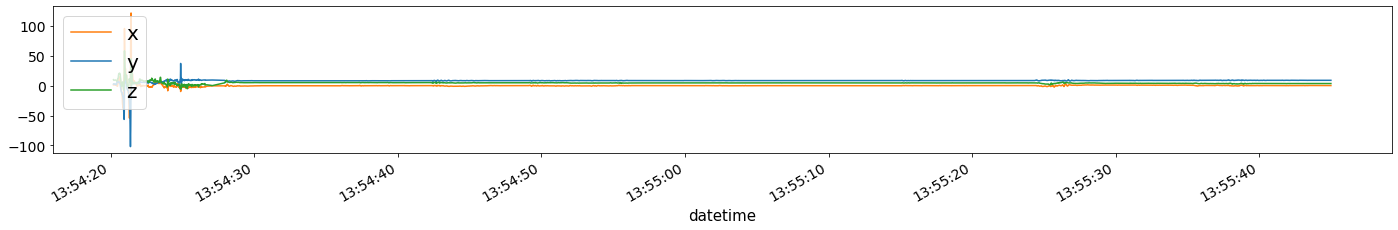

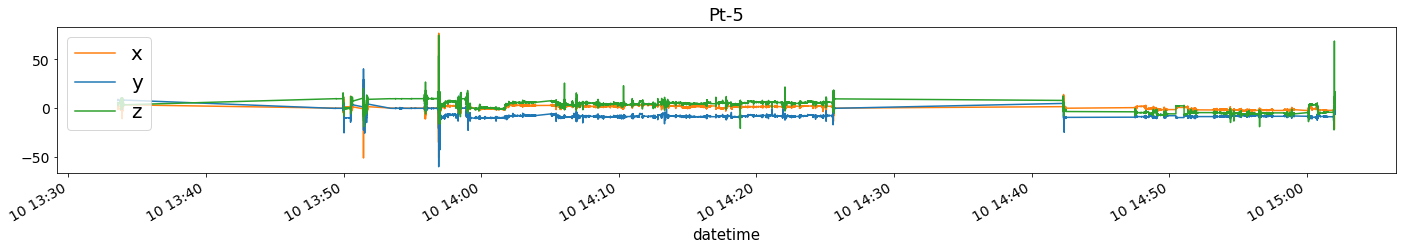

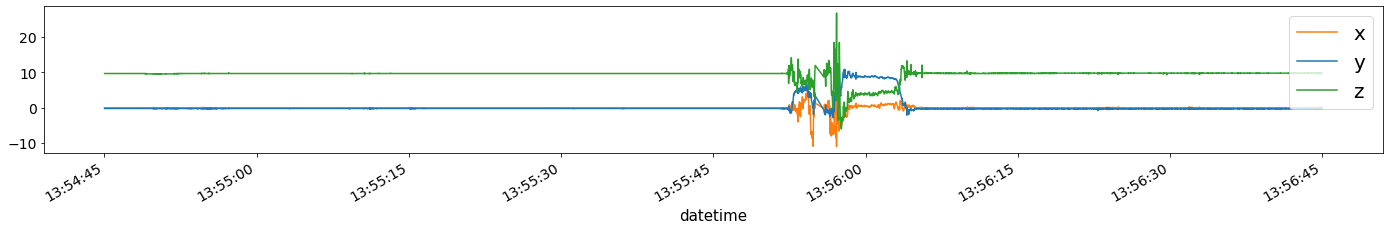

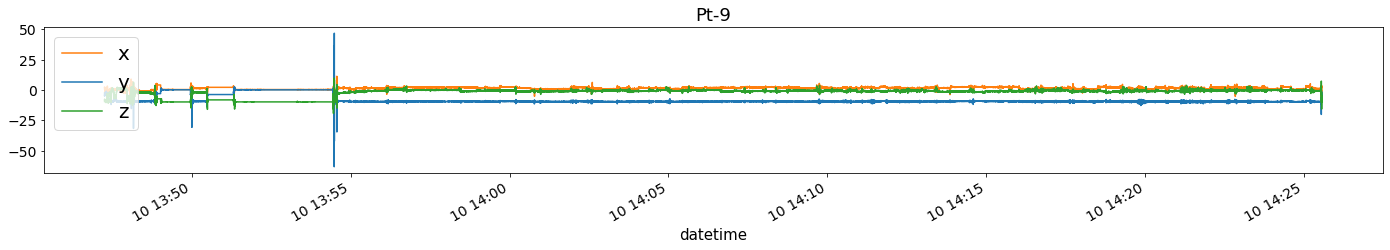

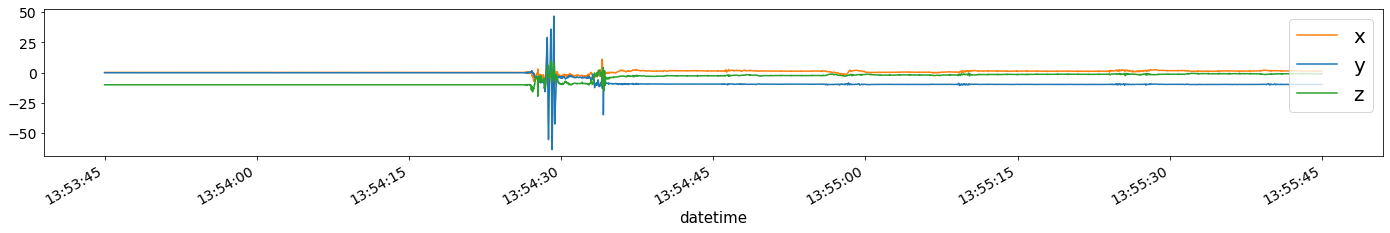

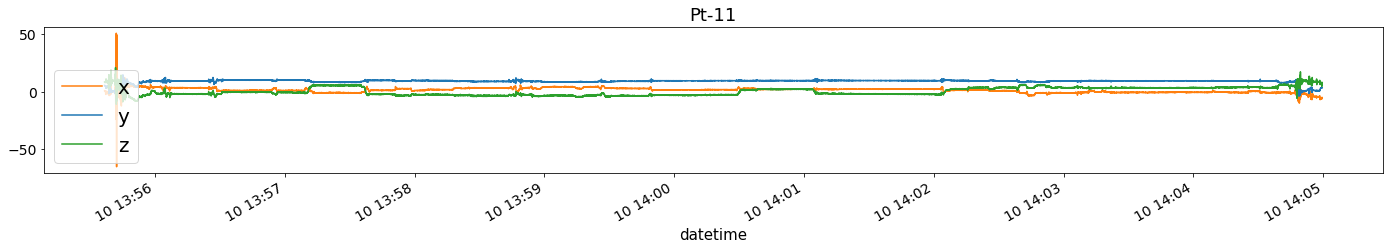

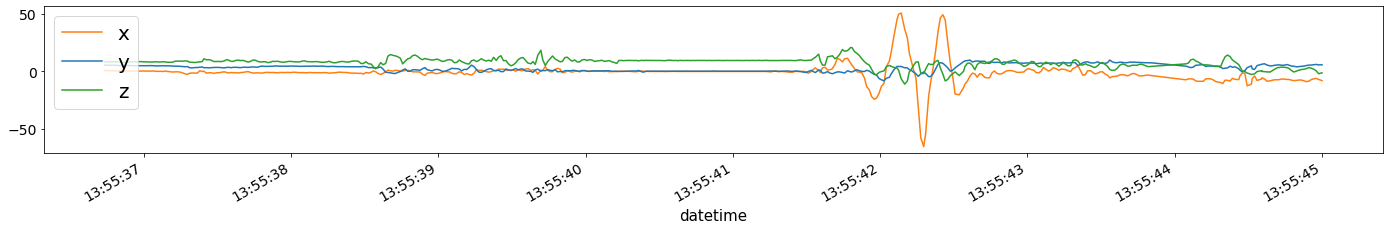

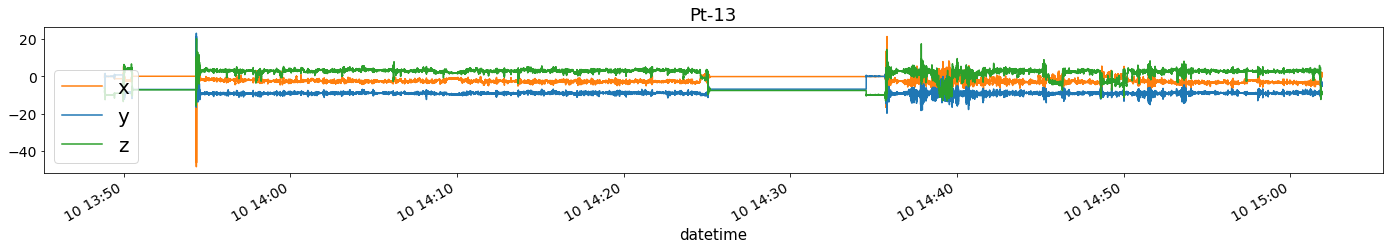

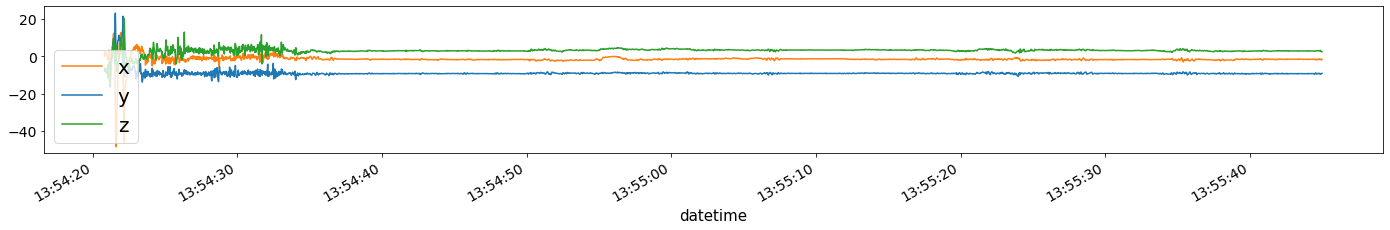

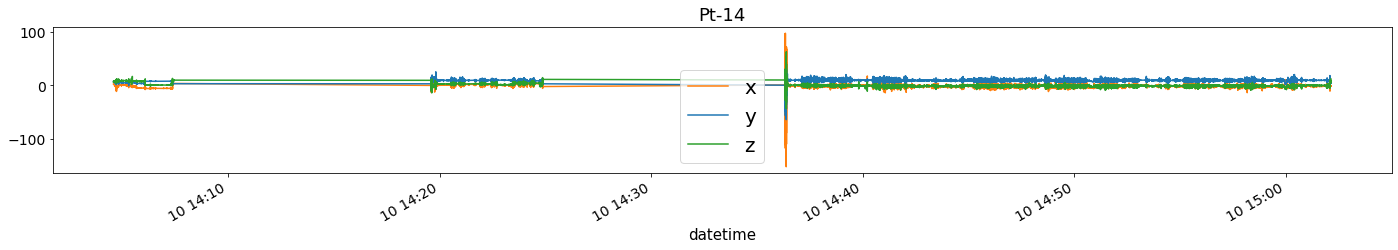

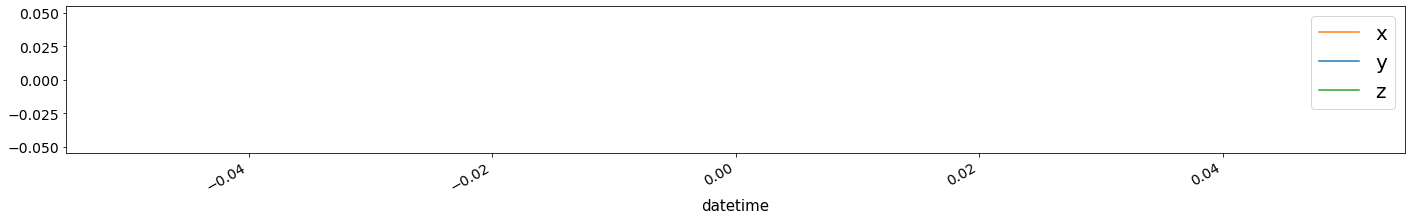

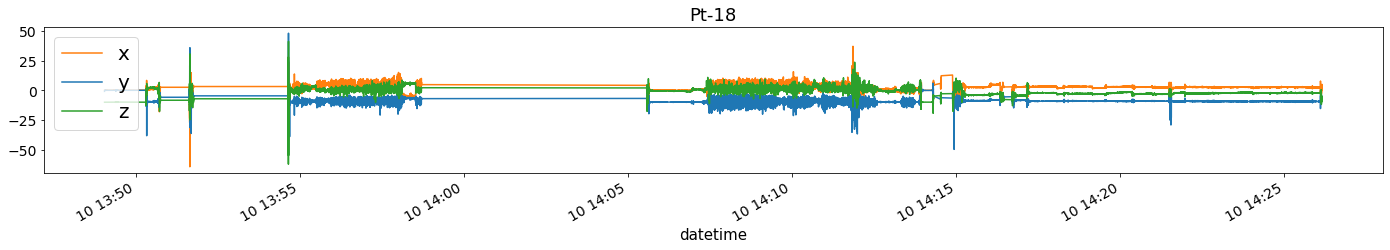

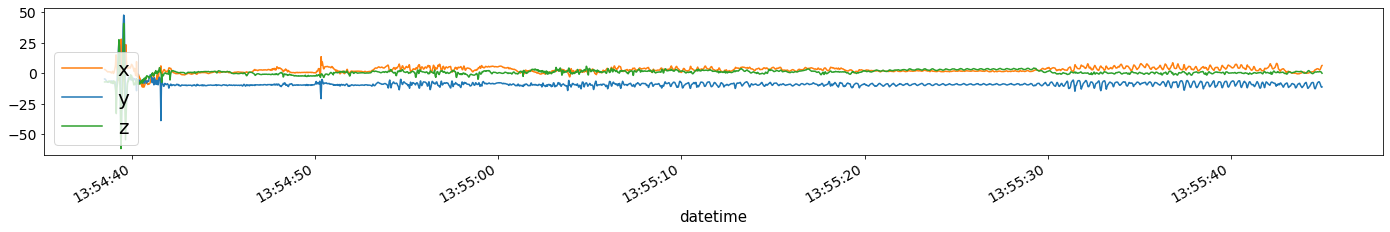

In [17]:
# Extract first minutes after performance start
for k,v in renick_audience.items():
    df_motion = renick_audience[k]
    # plot full data
    df_motion.loc[:, "x":"z"].plot(figsize=(24,3), color = ['tab:orange','tab:blue','tab:green']) # if want minutes use x = "xaxis_min"
    start_time = pd.to_datetime('2020-07-10 13:53.75')# look at 13:54 onwards because nothing before this could be the shake
    if k ==5:
        start_time = start_time+pd.Timedelta("1 minute") # shift the range of this participant over because it seems like their shake was later
    time_change = pd.Timedelta("2 minutes")
    end_time = start_time + time_change
    df_motion_one_min = df_motion.sort_index().loc[start_time : end_time, :]
    plt.title(label = "Pt-"+str(k))
    #plot one minute
    df_motion_one_min.loc[:, "x":"z"].plot(figsize=(24,3), color = ['tab:orange','tab:blue','tab:green']) # if want minutes use x = "xaxis_min"

#### Notes on Renick's audience data
It appears that all participants have the shake within the first 2 mins except Pt-14 who doesn't seem to have much data during Renick's performance.

### Change backend to interactive

In [11]:
import matplotlib.pyplot as plt
%matplotlib qt5 

### ID the shake

The following section only needs to be run once to identify the starts by clicking. It has been changed to markdown so that it isn't accidentally run and therefore needed to be done again.  
Recall that participants were instructred to place thier phones down on a table, press record, and then when they heard the first sound, they were told to pick up their phones and then shake them, and then to place their phones on their bodies. Therefore I should actually click the point before the shake when the participant picks their phone up to demarcate the first sound Renick plays.  
Therefore, to identify the start of the music, I looked at the shake, and went to the first indication of a change from the phone being on the table. 

#### Make dictionary
shake_start_dict_renick = {}
#### Extract first minutes after performance start
for k,v in renick_audience.items():
    df_motion = v #renick_audience[k]
    start_time = pd.to_datetime('2020-07-10 13:53.75')# look at 13:54 onwards because nothing before this could be the shake
    if k ==5:
        start_time = pd.to_datetime('2020-07-10 13:55') # shift the range of this participant over because it seems like their shake was later
    time_change = pd.Timedelta("2 minutes")
    end_time = start_time + time_change
    df_motion_shake = df_motion.sort_index().loc[start_time : end_time, :]
    plt.title(label = "Pt-"+str(k))
    
    fig, ax = plt.subplots( figsize=(24,3)) # nrows=3, ncols=1,

    ax.plot(df_motion_shake['timestamp'], df_motion_shake['x'])
    ax.plot(df_motion_shake['timestamp'], df_motion_shake['y'])
    ax.plot(df_motion_shake['timestamp'], df_motion_shake['z'])

    shake_start = plt.ginput(1)
    
    plt.show()
    
    shake_start_dict_renick[k] = shake_start[0][0]

### Save the shake start into a file so you don't need to do it again

The code in the next block has also been converted to markdown because the code block needs to only be run once after the starts have been clicked in the code block above.

In [ ]:
#### Save the dicts in pickle
from datetime import date
today = date.today()
fname = "shake_start_dict_renick_"+str(today)+".pickle"

import pickle
with open(fname, 'wb') as handle: 
    pickle.dump(shake_start_dict_renick, handle, protocol = pickle.HIGHEST_PROTOCOL)    

In [19]:
# Open dict from pickle
import pickle 
fname = "shake_start_dict_renick_2021-06-14.pickle"
with open(fname, 'rb') as handle: 
    shake_start_dict_renick = pickle.load(handle)

Timestamps are written in milliseconds (ms) therefore I need to find the end of the performance by adding the duration in ms to the start.   
Duration: ~30 minutes * 60 seconds * 1000 milliseconds = 1800000

### ID the end

In [21]:
performance_end_time = {}
duration = 1800000 # 30 mins x 60 secs x 1000 ms
for k,v in shake_start_dict_renick.items():
        end_time = v+duration
        performance_end_time[k] = end_time

## Extract the performance from the full motion dataframe

In [22]:
#### Change backend back to inline
import matplotlib.pyplot as plt
%matplotlib inline 

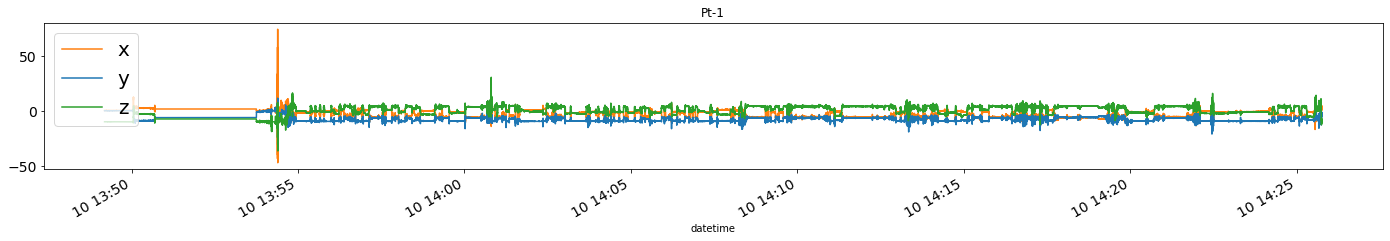

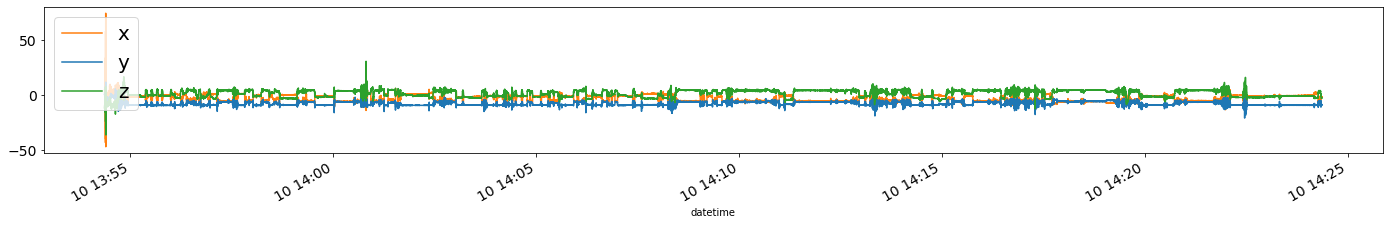

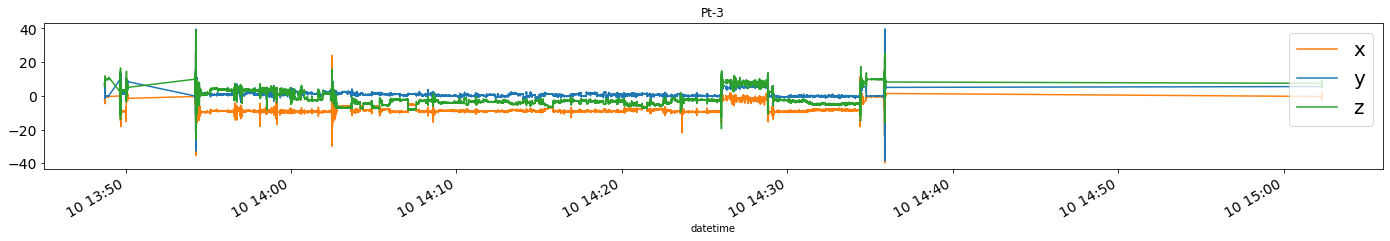

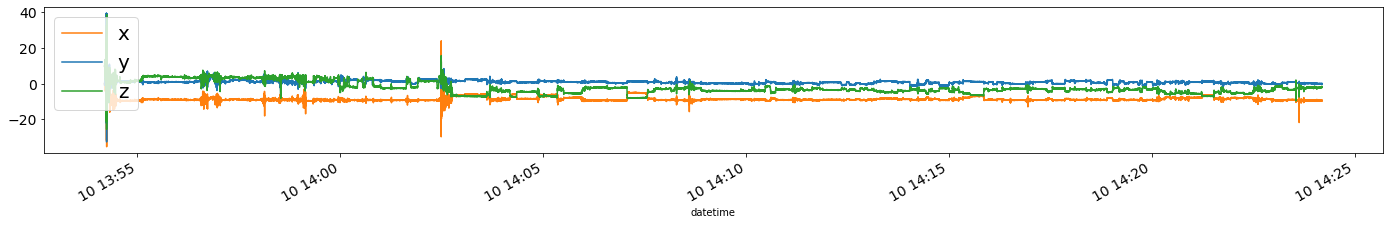

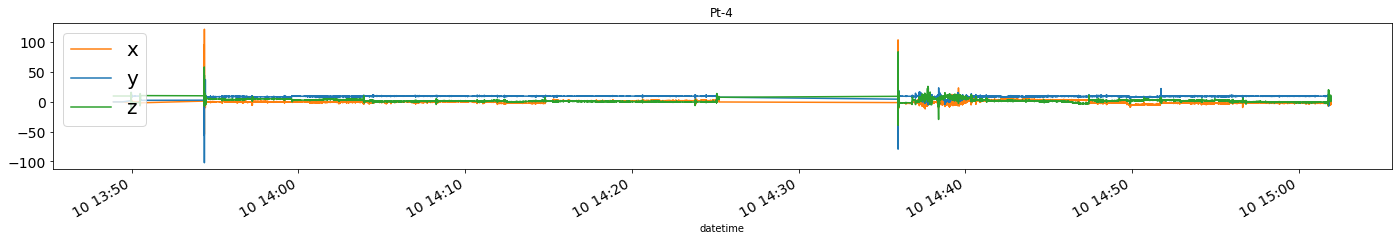

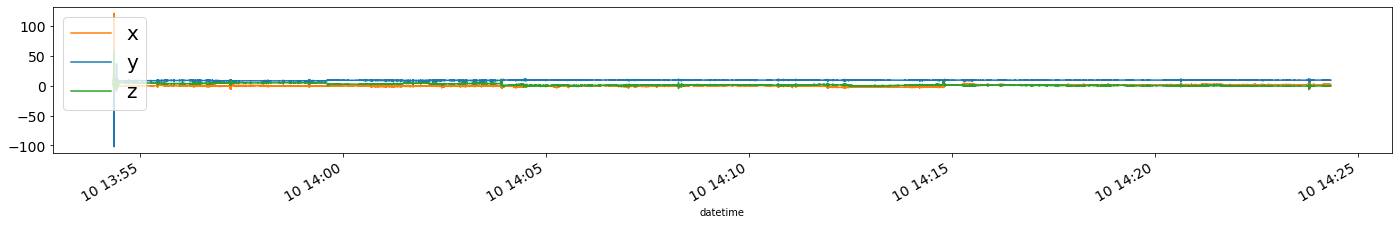

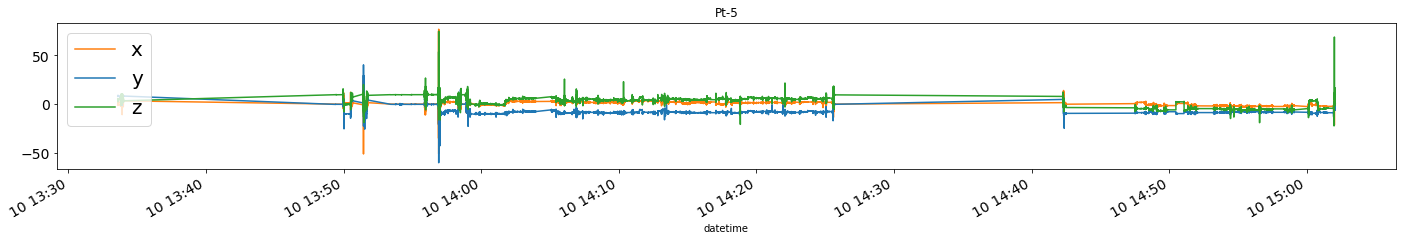

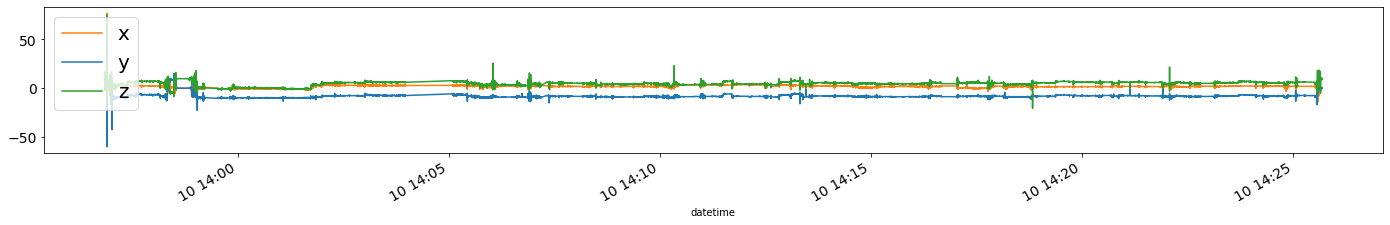

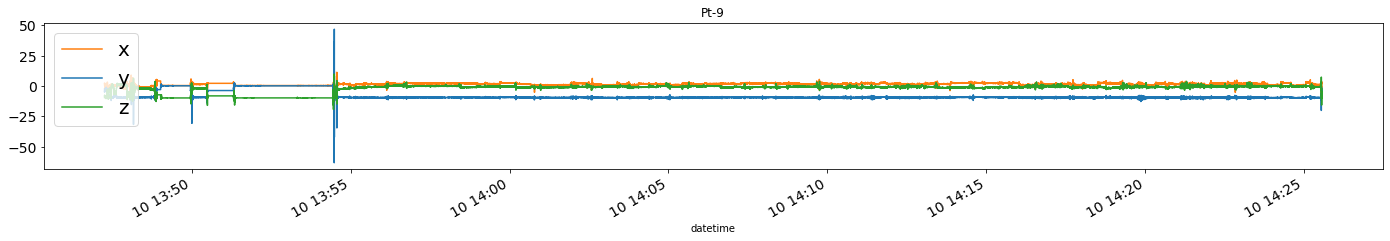

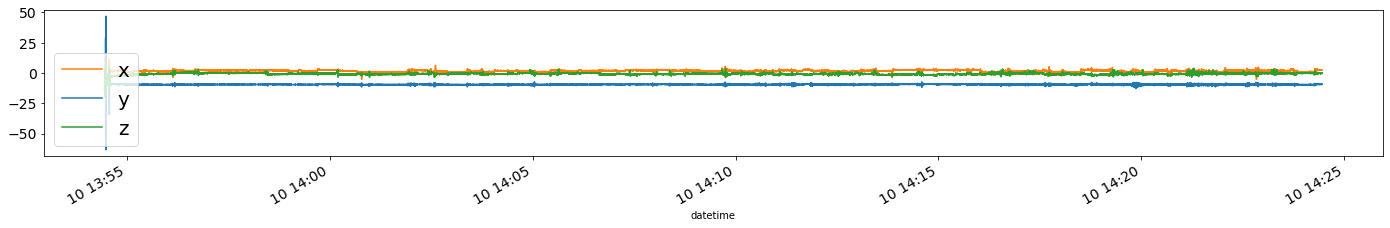

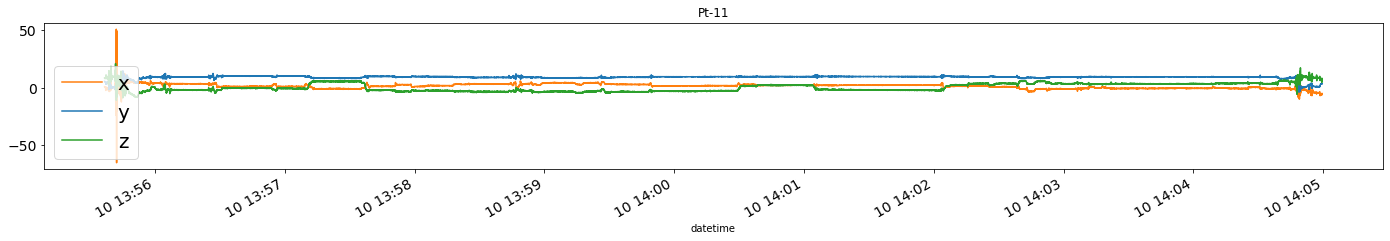

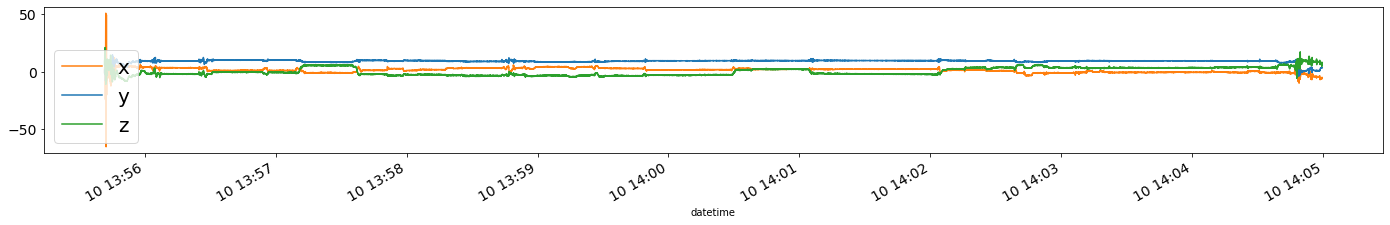

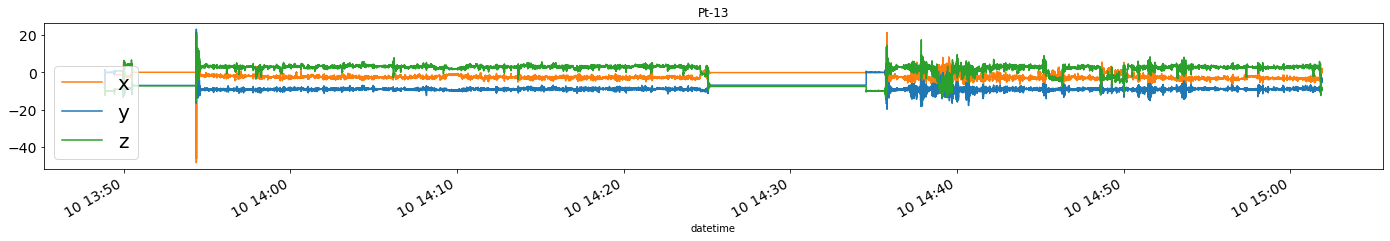

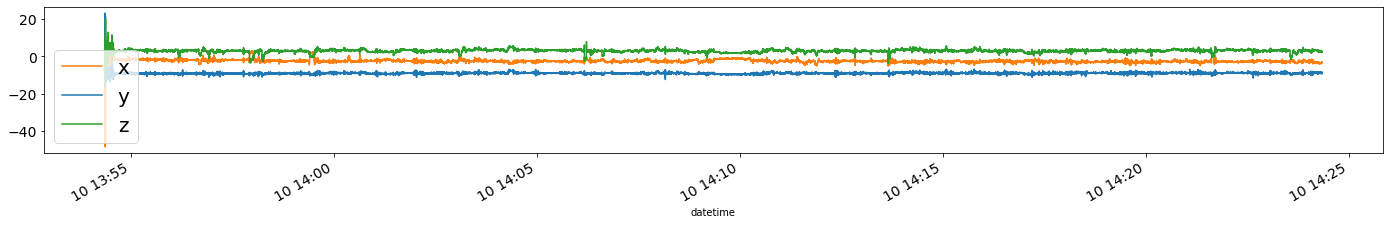

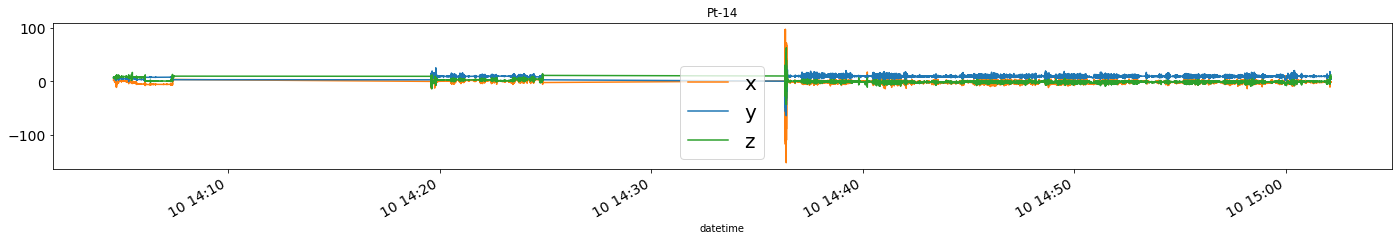

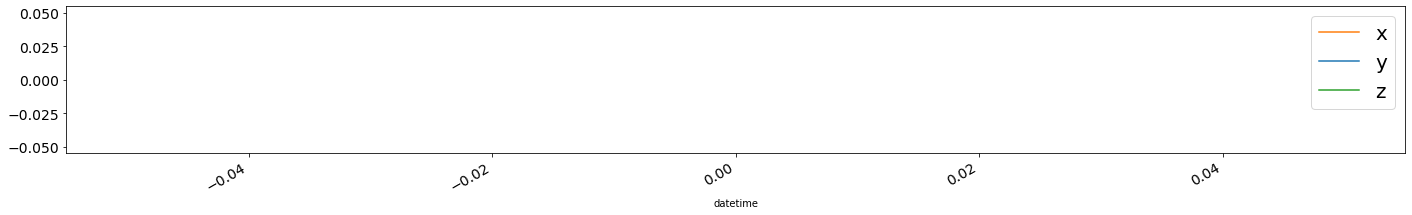

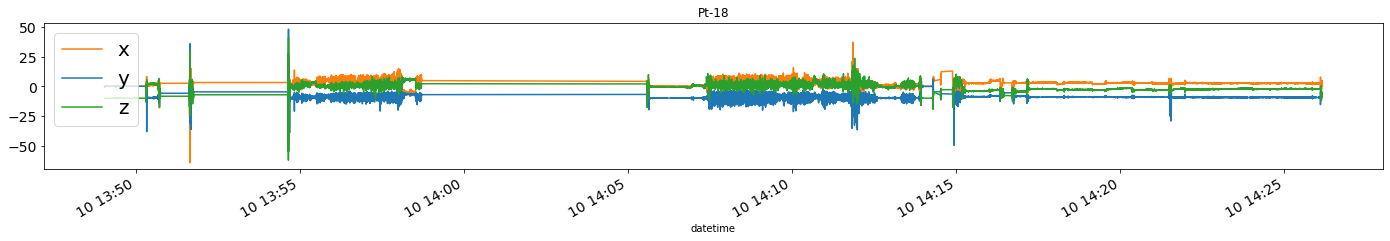

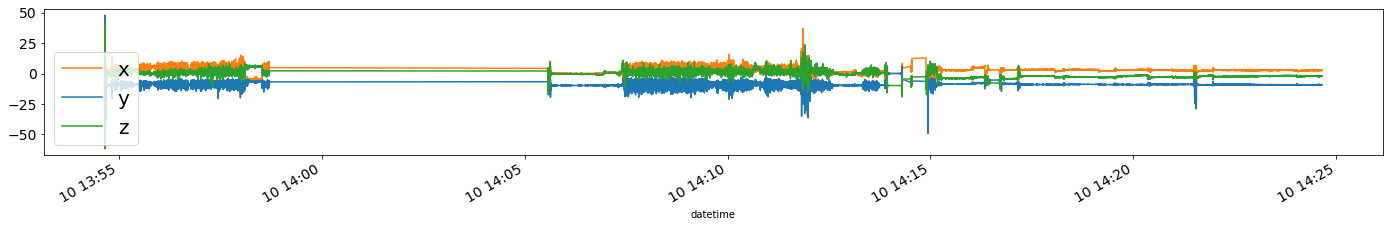

In [29]:
renick_audience_excerpt = {}
for k,v in renick_audience.items():
    df_motion = v
    start = shake_start_dict_renick[k] # timestamp
    end = performance_end_time[k] # timestamp
    start_index = pd.to_datetime(start, unit='ms')# convert to pd_datetime
    end_index = pd.to_datetime(end, unit='ms')# convert to pd_datetime
    excerpt = df_motion.sort_index().loc[start_index : end_index, :] 
    renick_audience_excerpt[k] = excerpt
    df_motion.loc[:, "x":"z"].plot(figsize=(24,3), color = ['tab:orange','tab:blue','tab:green']) # if want minutes use x = "xaxis_min"
    plt.title(label = "Pt-"+str(k))
    excerpt.loc[:, "x":"z"].plot(figsize=(24,3), color = ['tab:orange','tab:blue','tab:green']) # if want minutes use x = "xaxis_min"

In [28]:
#### Change backend back to inline
import matplotlib.pyplot as plt
%matplotlib inline 

## Save 
Save in a data structure that can be passed back into another notebook

In [30]:
today = date.today()
fname = "renick_audience_excerpt_"+str(today)+".pickle"
with open(fname, 'wb') as handle: 
    pickle.dump(renick_audience_excerpt, handle, protocol = pickle.HIGHEST_PROTOCOL)   

## Repeat for Khoparzi

### Create dictionary of Khoparzi's audience 

Note: the df_motion files are not being cut when they are being stored. This section of code is only storing those participants who have some data during Renick's performance and removing those who do not. 

In [27]:
## Remove participants who have no data during khoparzi's performance (pt 1,9,10,11,18)
khoparzi_audience = {}
for k,v in df_motion_dict.items():
    df_motion = df_motion_dict[k]
    df_motion_r = df_motion.sort_index().loc['2020-07-10 14:34' : '2020-07-10 15:04', :] # Real times: '2020-07-10 14:36' : '2020-07-10 15:04'; or 14:34-15:04 
    if len(df_motion)>6000: # remove any dataframes not containing more than 6 seconds of data (Pt-3 has only 5.8 seconds)
        khoparzi_audience[k]=df_motion  

## Identify the shake with ginput

### Check to make sure that the shake is in the first 2 mins of each participants' data

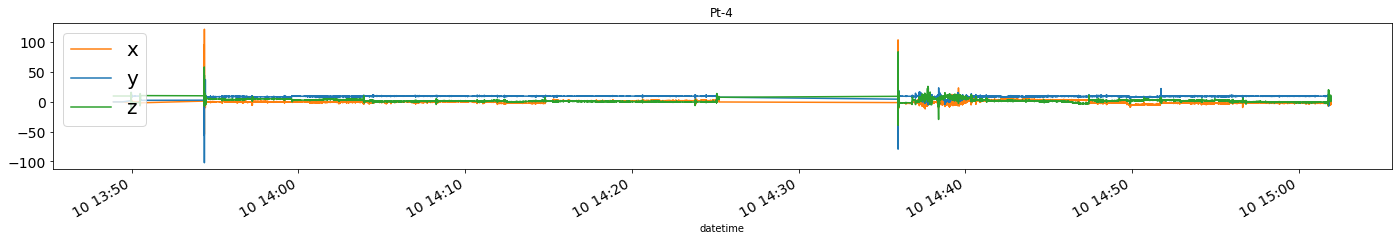

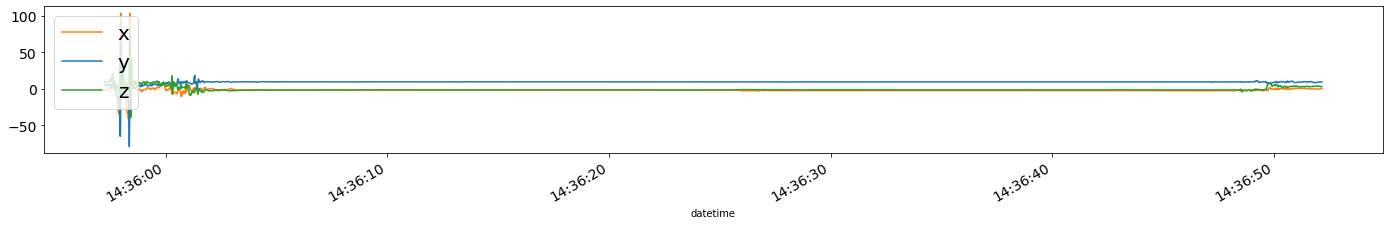

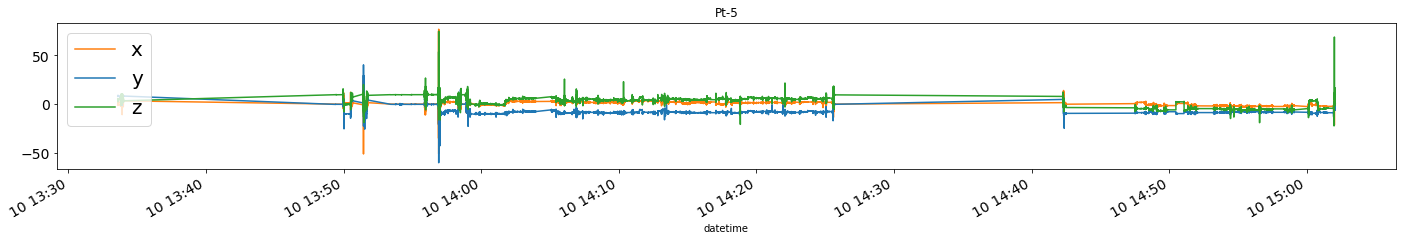

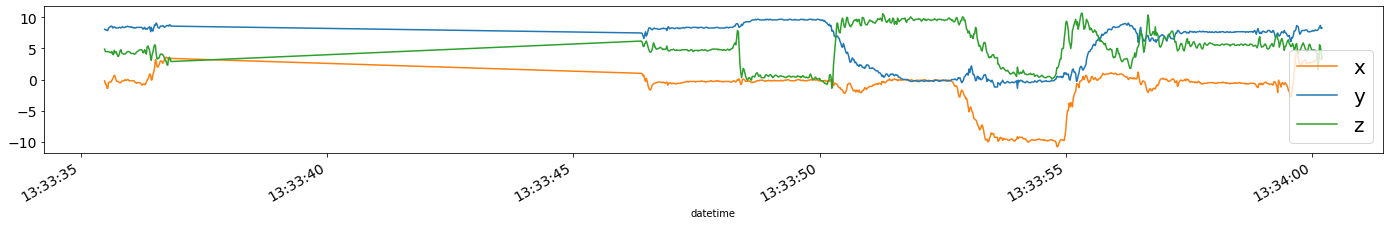

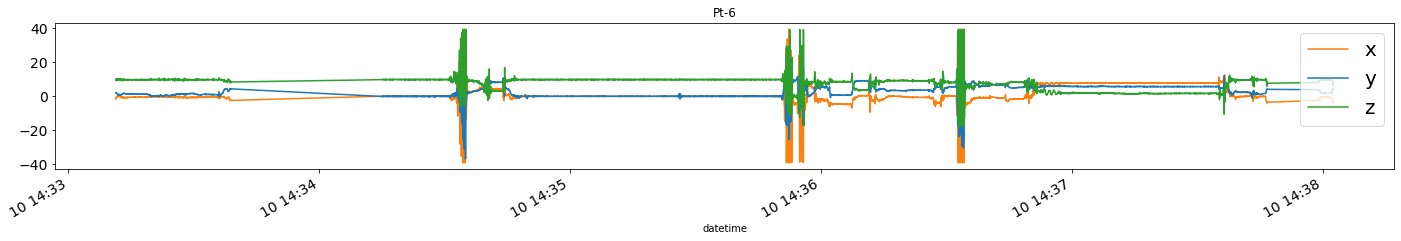

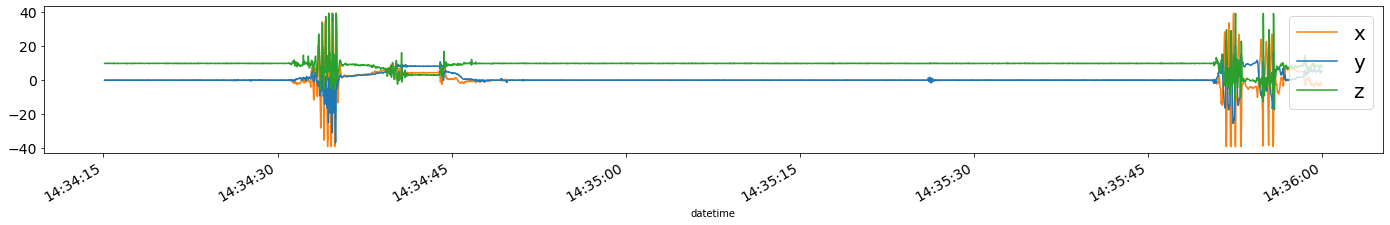

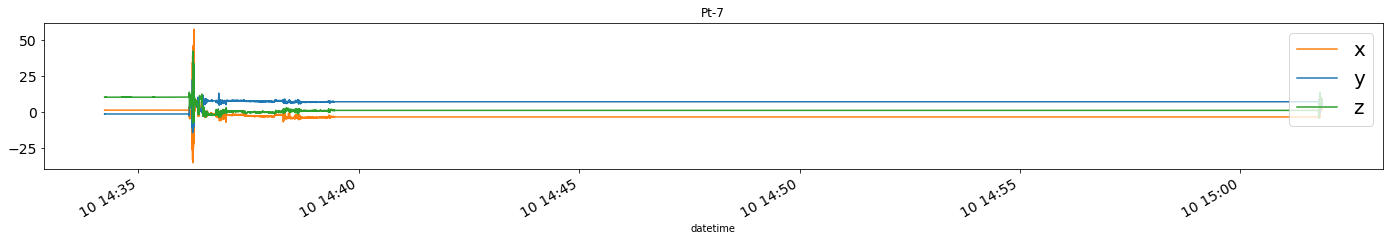

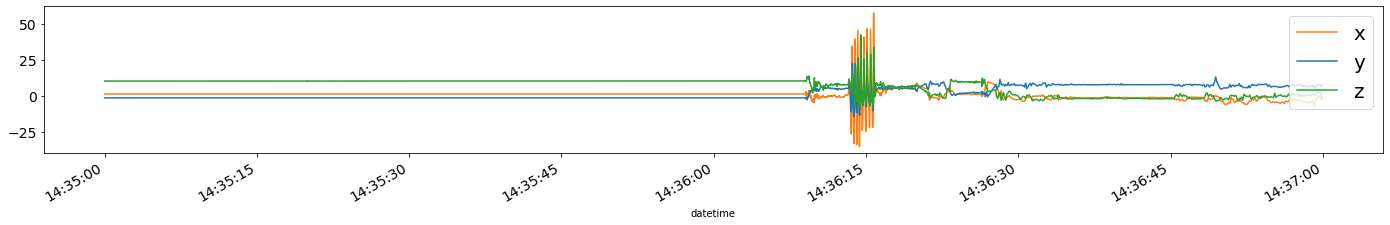

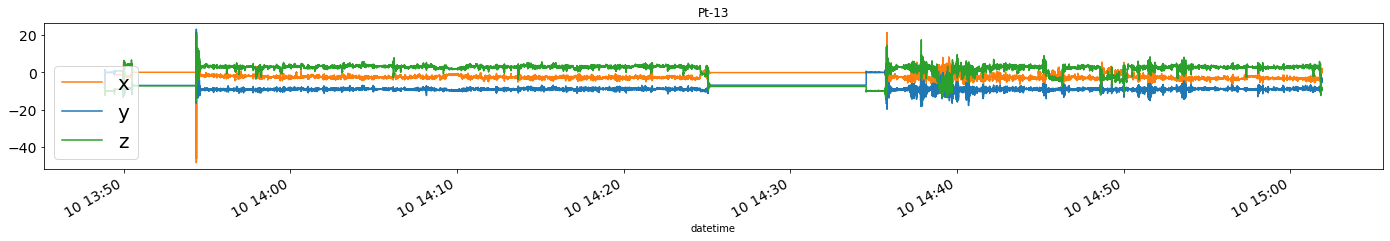

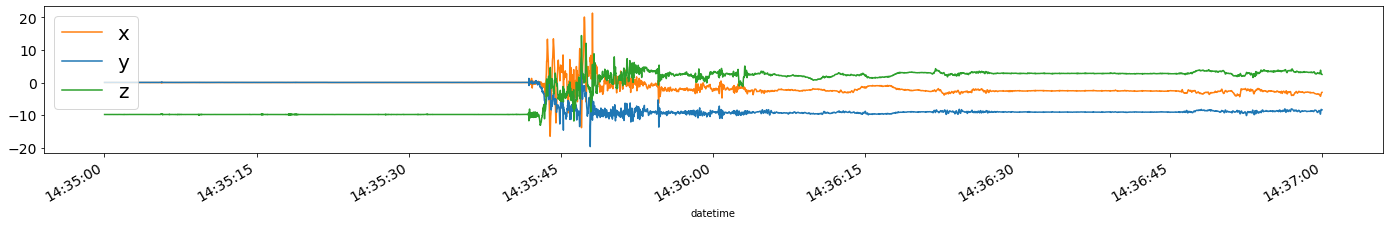

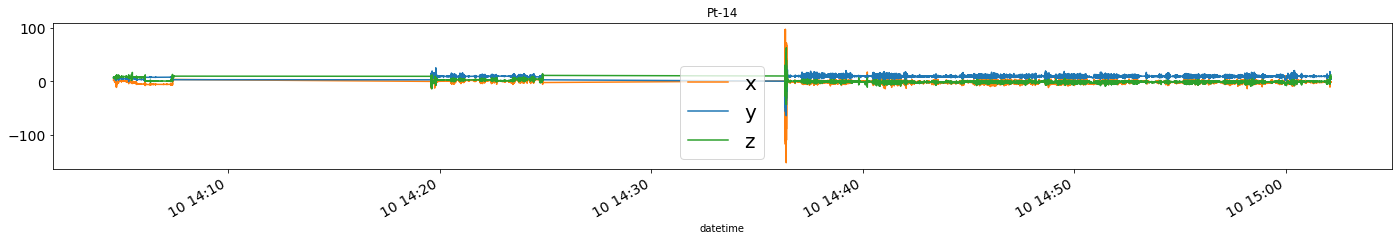

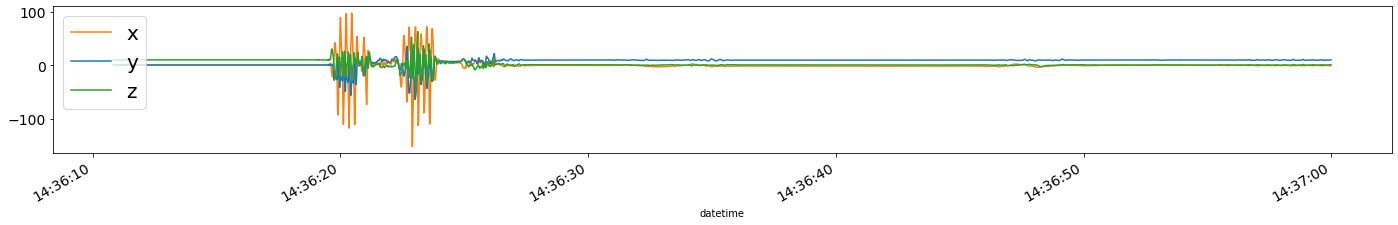

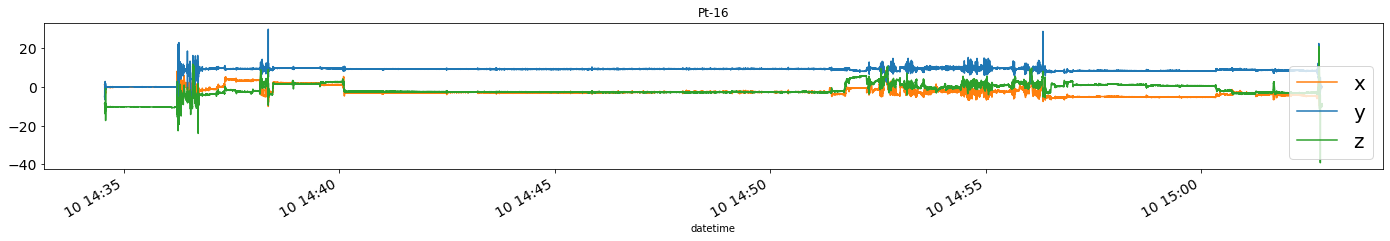

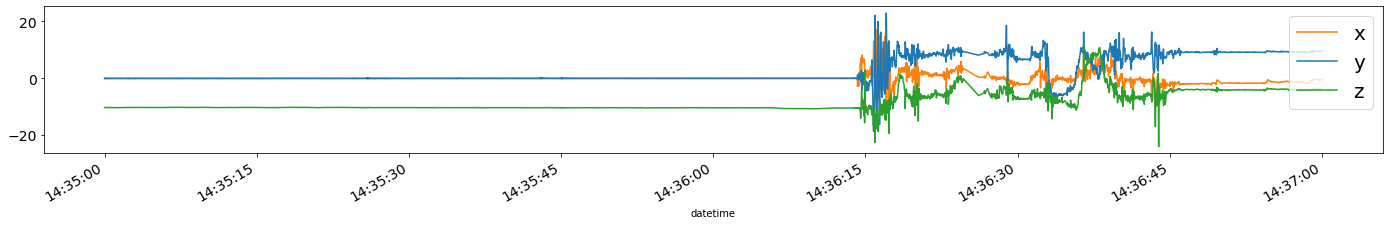

In [28]:
# Extract first minutes after Khoparzi's performance start
for k,v in khoparzi_audience.items():
    df_motion = khoparzi_audience[k]
    # plot full data
    df_motion.loc[:, "x":"z"].plot(figsize=(24,3), color = ['tab:orange','tab:blue','tab:green']) # if want minutes use x = "xaxis_min"
    start_time = pd.to_datetime('2020-07-10 14:35')# look at 14:34 onwards because nothing before he started playing could be the shake
    if k ==5: 
        start_time = df_motion.first_valid_index()
    if k == 6: 
        start_time = pd.to_datetime('2020-07-10 14:34')
    time_change = pd.Timedelta("2 minutes")
    end_time = start_time + time_change
    df_motion_one_min = df_motion.sort_index().loc[start_time : end_time, :]
    plt.title(label = "Pt-"+str(k))
    #plot one minute
    df_motion_one_min.loc[:, "x":"z"].plot(figsize=(24,3), color = ['tab:orange','tab:blue','tab:green']) # if want minutes use x = "xaxis_min"

#### Notes on Khoparzi's audience data
* Pt-5's data begins much later than expeced with no clear shake therefore it is unclear what is happening here  
* Pt-6 only contains 4-minutes of motion data and there are 3 shakes. It is unclear which shake might demarcate the first sound...perhaps the first does but it occurs before many of the other participants' therefore it is unclear what the shakes represent.

These two participants may need to be excluded

### Change backend to interactive

In [29]:
import matplotlib.pyplot as plt
%matplotlib qt5 

### ID the shake

The following section only needs to be run once to identify the starts by clicking. It has been changed to markdown so that it isn't accidentally run and therefore needed to be done again.  
Recall that participants were instructed to place thier phones down on a table, press record, and then when they heard the first sound, they were told to pick up their phones and then shake them, and then to place their phones on their bodies (preferably upper bodies). Therefore I should actually click the point before the shake when the participant picks their phone up to demarcate the first sound Khoparzi plays.  
Therefore, to identify the start of the music, I looked at the shake, and went to the first indication of a change from the phone being on the table. 

#### Make dictionary
shake_start_dict_khoparzi = {}
#### Extract first minutes after performance start
for k,v in khoparzi_audience.items():
    df_motion = v 
    start_time = pd.to_datetime('2020-07-10 14:35')# look at 14:34 onwards because nothing before khoparzi started playing could be the shake
    if k ==5: 
        start_time = df_motion.first_valid_index()
    if k == 6: 
        start_time = pd.to_datetime('2020-07-10 14:34')
    time_change = pd.Timedelta("2 minutes")
    end_time = start_time + time_change
    df_motion_shake = df_motion.sort_index().loc[start_time : end_time, :]
    plt.title(label = "Pt-"+str(k))
    
    fig, ax = plt.subplots( figsize=(24,3)) # nrows=3, ncols=1,

    ax.plot(df_motion_shake['timestamp'], df_motion_shake['x'])
    ax.plot(df_motion_shake['timestamp'], df_motion_shake['y'])
    ax.plot(df_motion_shake['timestamp'], df_motion_shake['z'])

    shake_start = plt.ginput(1)
    
    plt.show()
    
    shake_start_dict_khoparzi[k] = shake_start[0][0]

### Save the shake start into a file so you don't need to do it again

The code in the next block has also been converted to markdown because the code block needs to only be run once after the starts have been clicked in the code block above.

#### Save the dicts in pickle
from datetime import date
today = date.today()
fname = "shake_start_dict_khoparzi_"+str(today)+".pickle"

import pickle
with open(fname, 'wb') as handle: 
    pickle.dump(shake_start_dict_khoparzi, handle, protocol = pickle.HIGHEST_PROTOCOL)    

In [30]:
# Open dict from pickle
import pickle 
fname = "shake_start_dict_khoparzi_2021-06-14.pickle"
with open(fname, 'rb') as handle: 
    shake_start_dict_khoparzi = pickle.load(handle)

Timestamps are written in milliseconds (ms) therefore I need to find the end of the performance by adding the duration in ms to the start.   
Duration: ~30 minutes * 60 seconds * 1000 milliseconds = 1800000

### ID the end

In [31]:
performance_end_time = {}
duration = 1800000
for k,v in shake_start_dict_khoparzi.items():
        end_time = v+duration
        performance_end_time[k] = end_time

## Extract the performance from the full motion dataframe

In [32]:
#### Change backend back to inline
import matplotlib.pyplot as plt
%matplotlib inline 

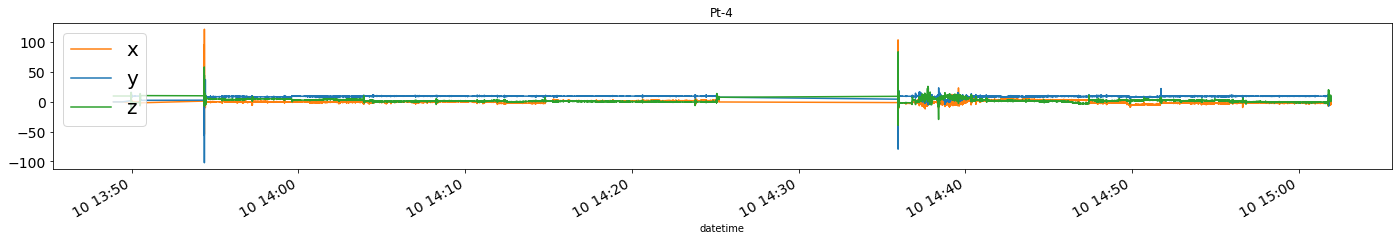

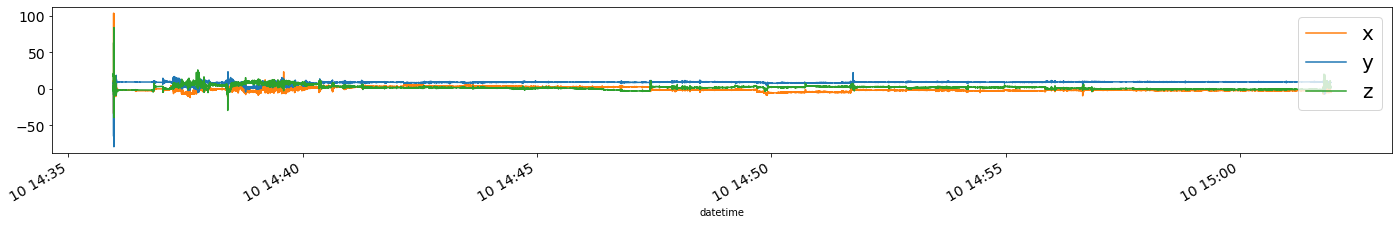

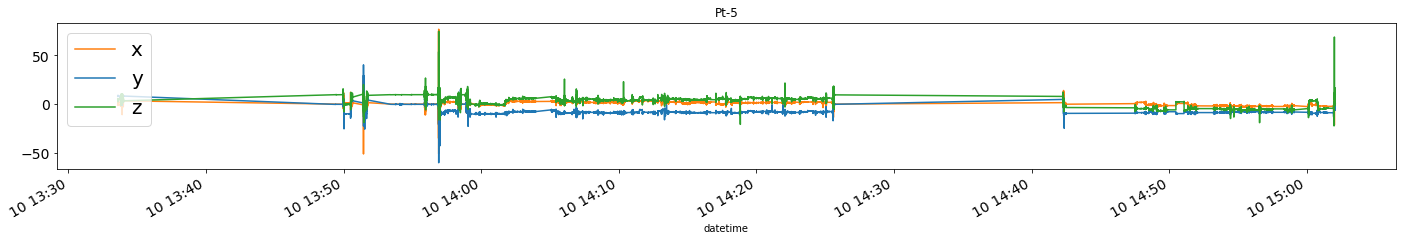

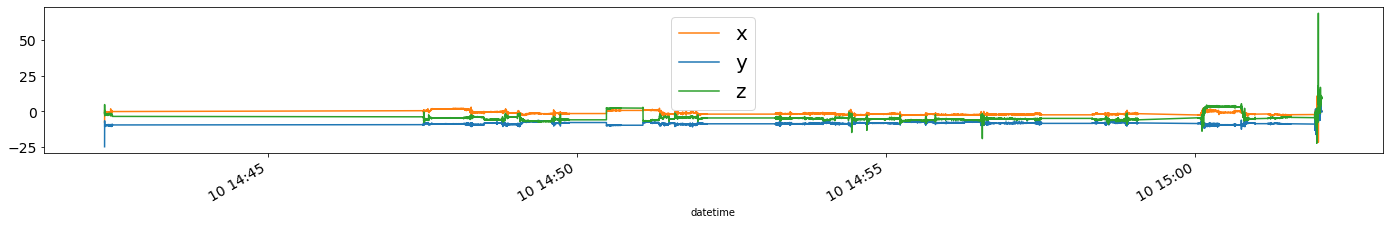

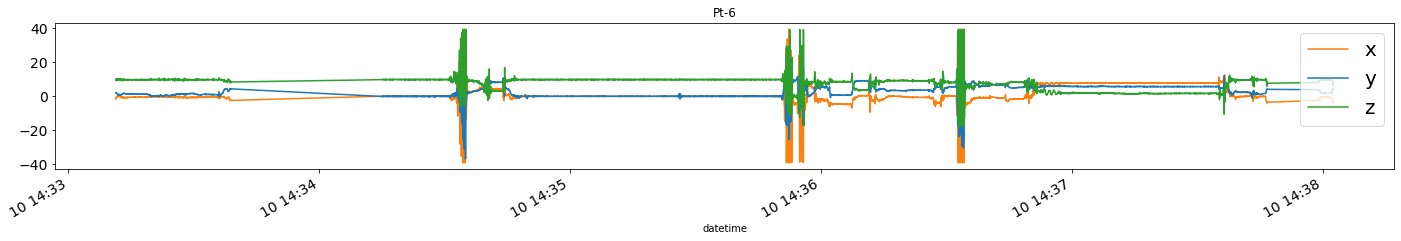

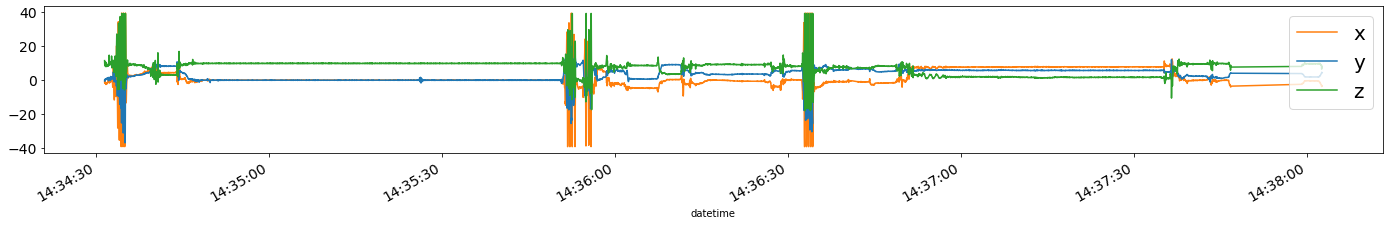

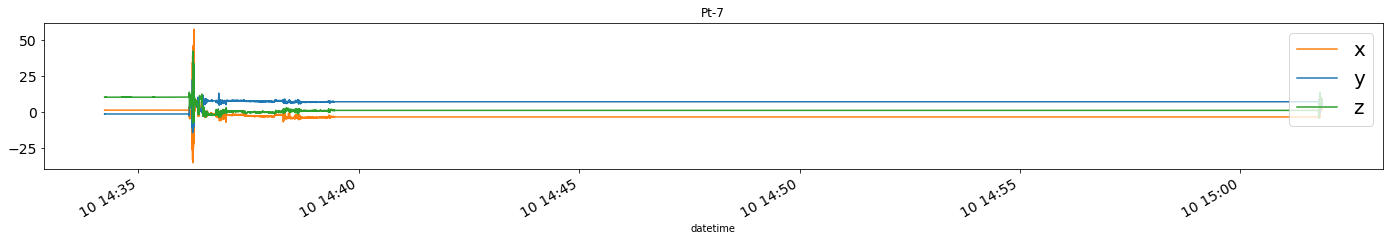

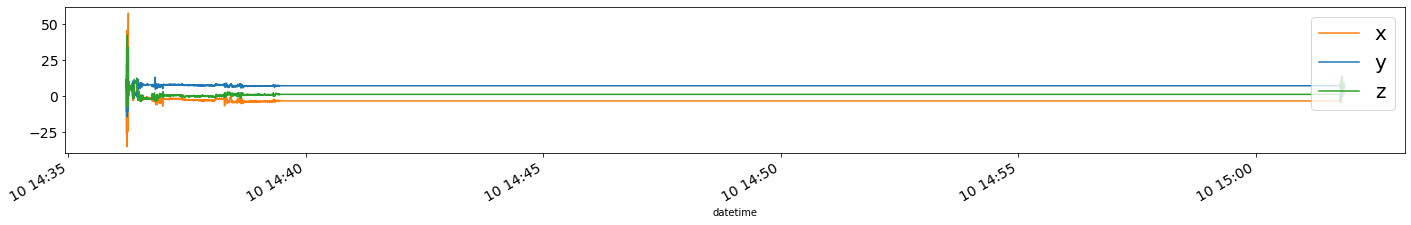

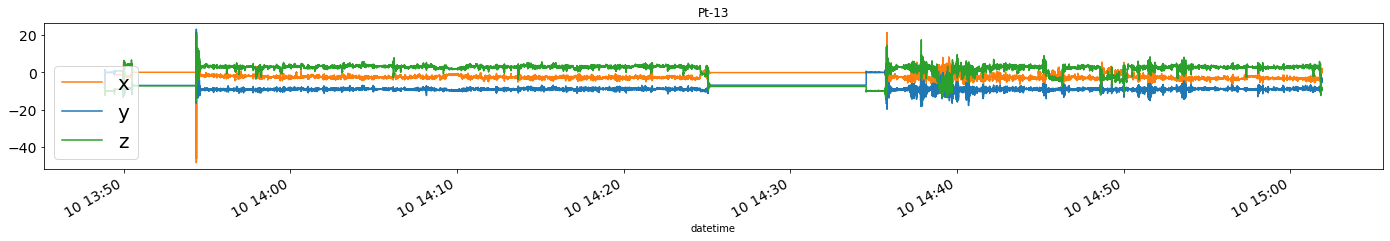

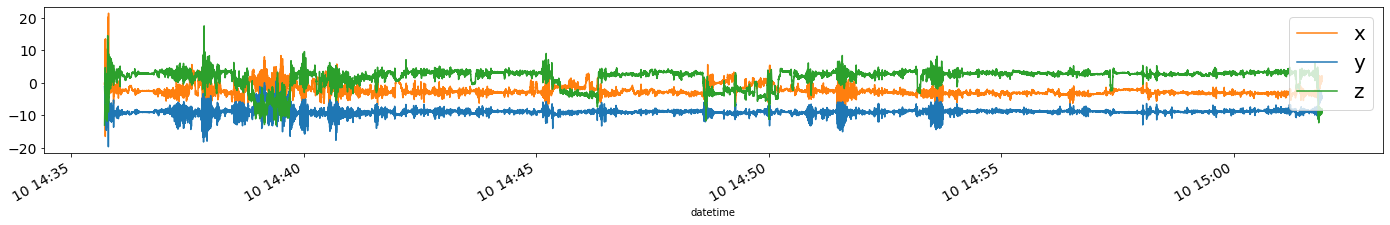

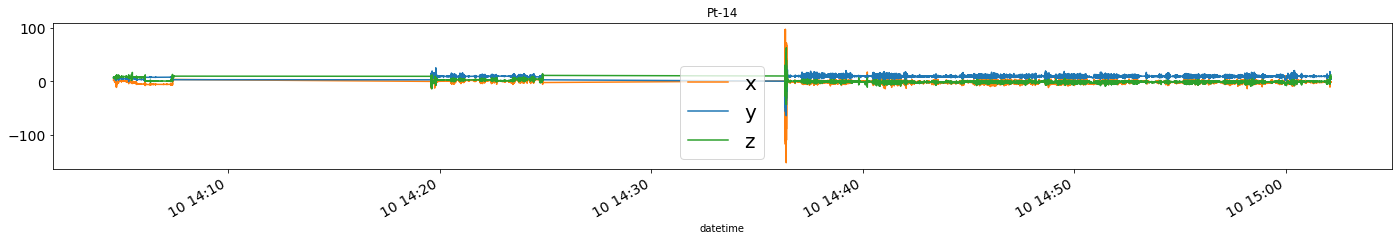

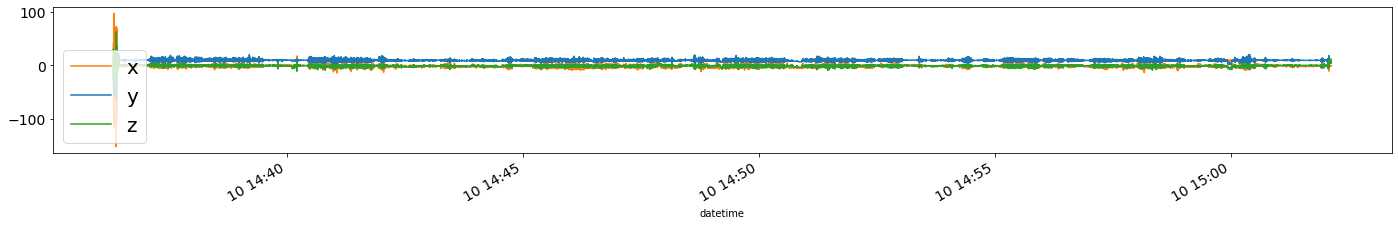

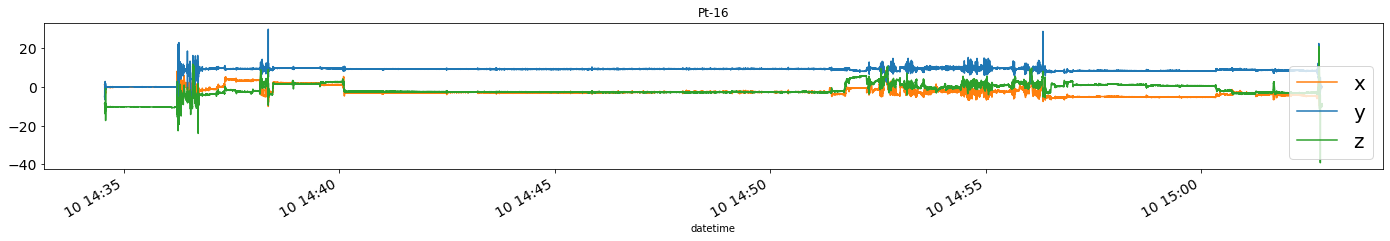

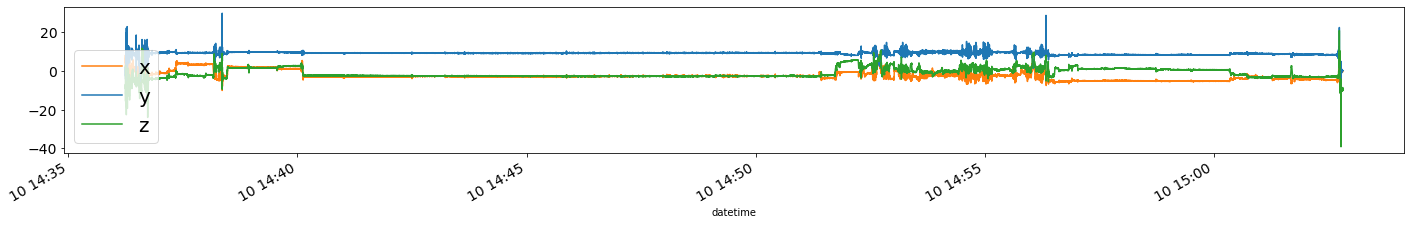

In [33]:
khoparzi_audience_excerpt = {}
for k,v in khoparzi_audience.items():
    df_motion = v
    start = shake_start_dict_khoparzi[k] # timestamp
    end = performance_end_time[k] # timestamp
    start_index = pd.to_datetime(start, unit='ms')# convert to pd_datetime
    end_index = pd.to_datetime(end, unit='ms')# convert to pd_datetime
    excerpt = df_motion.sort_index().loc[start_index : end_index, :] 
    khoparzi_audience_excerpt[k] = excerpt
    df_motion.loc[:, "x":"z"].plot(figsize=(24,3), color = ['tab:orange','tab:blue','tab:green']) # if want minutes use x = "xaxis_min"
    plt.title(label = "Pt-"+str(k))
    excerpt.loc[:, "x":"z"].plot(figsize=(24,3), color = ['tab:orange','tab:blue','tab:green']) # if want minutes use x = "xaxis_min"

## Save 
Save in a data structure that can be passed back into another notebook

In [34]:
today = date.today()
fname = "khoparzi_audience_excerpt_"+str(today)+".pickle"
with open(fname, 'wb') as handle: 
    pickle.dump(khoparzi_audience_excerpt, handle, protocol = pickle.HIGHEST_PROTOCOL)   